# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

---
## Risoluzione
---

Gli **Algoritmi Genetici** sono un'importante famiglia di algoritmi utilizzati nei problemi di ottimizzazione che imitano l'**Evoluzione Biologica** delle popolazioni. Nello stesso modo in cui una popolazione si evolve per l'incorrere di mutazioni casuali in alcuni suoi individui e per il rimescolamento del patrimonio genetico attraverso la riproduzione, così negli algoritmi genetici vengono inserite **mutazioni casuali** e **Crossover** dei patrimoni genetici di due individui "genitori" al fine di arrivare a produrre l'individuo che meglio si adatta all'ambiente ovvero quello che risolve il problema di ottimizzazione.

In questo caso andiamo ad applicare un Algoritmo Genetico per la risoluzione del problema del **Commesso Viaggiatore** che deve visitare $34$ città una e una sola volta compiendo il percorso più corto nel caso in cui queste siano disposte su una circonferenza o all'interno di un quadrato.

Vengono riportati sotto le rappresentazioni dei migliori percorsi trovati

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':10,
    'savefig.directory':'./Images'
})

In [16]:
c=np.loadtxt("CIRCLE/PATH/element_299_0_0.txt",delimiter='\t',skiprows=0)
s=np.loadtxt("SQUARE/PATH/element_299_0_0.txt",delimiter='\t',skiprows=0)

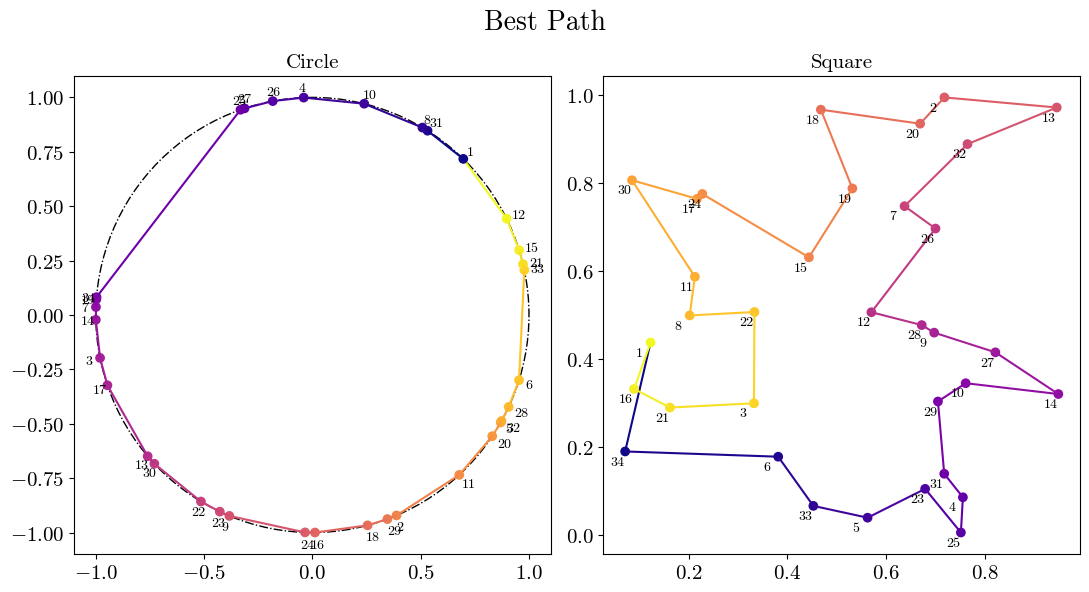

In [17]:
x = c[:,1]
y = c[:,2]
l = c[:,0]
f = np.arange(len(x))
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(11,6))
ax[0].scatter(x,y,c=f,cmap='plasma',zorder=2)
cmap = plt.get_cmap('plasma')
colors = cmap(f/f.max())
circle1 = plt.Circle((0,0),1,color='black',linestyle='-.',fill=False,zorder=0)
for i,txt in enumerate(l):
    ax[0].annotate(int(txt),(x[i]*1.05-0.02,y[i]*1.05-0.02))
    ax[0].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[0].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[0].add_patch(circle1)
ax[0].set_title('Circle',fontsize=15)

x = s[:,1]
y = s[:,2]
l = s[:,0]
#f = np.arange(len(x))
ax[1].scatter(x,y,c=f,cmap='plasma_r',zorder=2)
cmap = plt.get_cmap('plasma_r')
colors = cmap(f/f.max())
for i,txt in enumerate(l):
    ax[1].annotate(int(txt),(x[i]-0.03,y[i]-0.03))
    ax[1].plot(x[i:i+2],y[i:i+2],color=colors[i])
ax[1].plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)
ax[1].set_title('Square',fontsize=15)

fig.get_figure().suptitle('Best Path',fontsize=20)
plt.tight_layout()
plt.show()


L'algoritmo trova con successo il miglior percorso nel caso in cui le città siano disposte sulla circonferenza. Per quanto riguarda il caso in cui siano distribuite dentro a un quadrato si può osservare come l'algoritmo abbia trovato una buona soluzione ma che non è sicuramente la migliore (sarebbe quantomeno necessaria l'inversione $1\leftrightarrow16$ $^{(*)}$) anche se, a differenza del caso circolare, non è in generale facile notare ad occhio quale sia la soluzione ottimale.

$(*)$ per quella che è l'implementazione dell'algoritmo l'inversione $1\leftrightarrow16$ non può avvenire poichè la città $1$ non viene mai coinvolta dalle mutazioni. La mutazione necessaria quindi sarebbe lo shift in avanti di una posizione di tutte le altre $33$ città

Viene riportato anche l'andamento della **Loss Function** del miglior individuo della popolazione e il valor medio con varianza della miglior metà della popolazione. È possibile osservare come in entrambi i casi ci sia una marcata sovrapposizione tra le due funzioni segno di un'elevata diffusione dei caratteri che comportano una fitness maggiore. Questa diffusione elevata è probabilmente dovuta ad una selezione intergenerazionale molto esigente che va a scartare i caratteri più antiquati della popolazione.

In [18]:
lc=pd.read_csv('CIRCLE/loss_0.txt',sep='\t')
ls=pd.read_csv('SQUARE/loss_0.txt',sep='\t')

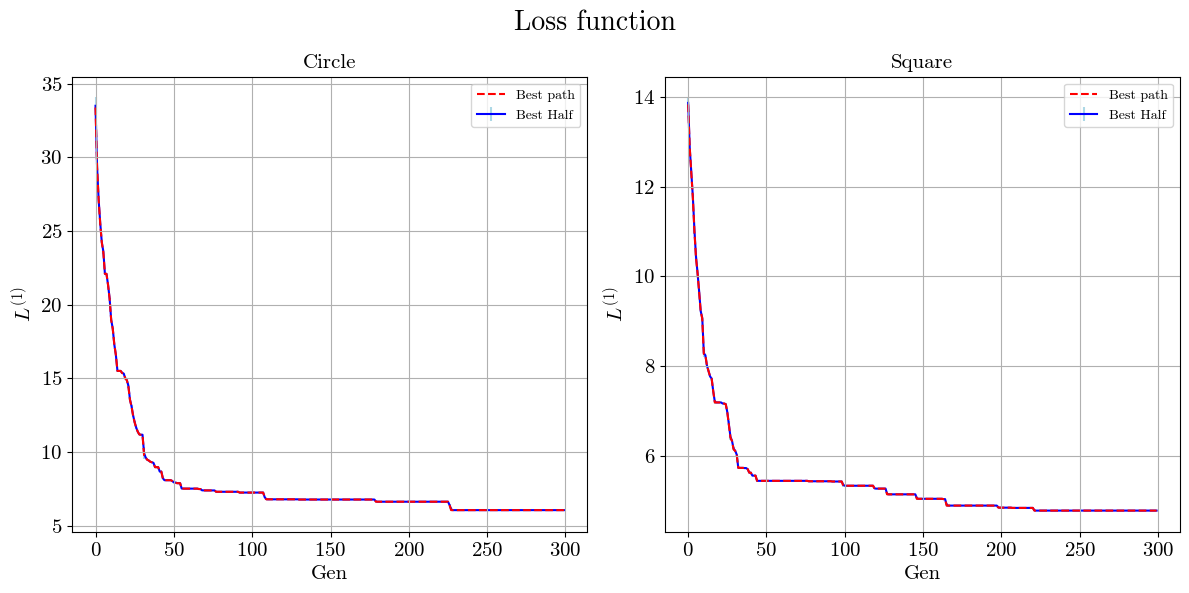

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.errorbar(lc['Gen'],lc['Mean'],lc['Err'],color='b',ecolor='lightblue',label='Best Half',zorder=0)
plt.plot(lc['Gen'],lc['Best'],color='red',linestyle='--',label='Best path',zorder=1)
plt.legend()
plt.ylabel('$L^{(1)}$')
plt.xlabel('Gen')
plt.title('Circle',fontsize=15)
plt.grid()
plt.subplot(1,2,2)
plt.errorbar(ls['Gen'],ls['Mean'],ls['Err'],color='b',ecolor='lightblue',label='Best Half',zorder=0)
plt.plot(ls['Gen'],ls['Best'],color='red',linestyle='--',label='Best path',zorder=1)
plt.legend()
plt.ylabel('$L^{(1)}$')
plt.xlabel('Gen')
plt.title('Square',fontsize=15)
plt.grid()
plt.suptitle('Loss function',fontsize=20)
plt.tight_layout()
plt.show()

Parametri dei plot:
- $34$ città
- popolazione da $200$ individui
- $300$ generazioni
- probabilità di Crossover: $0.8$
- probabilità delle mutazioni:
    - Permutazione: $0.08$
    - Permutazione Multipla: $0.08$
    - Inversione: $0.05$
    - Shift: $0.07$

### Codice
Per lo sviluppo del presente algoritmo ho creato tre classi per dare una struttura alla **città**, alla **sequenza di città** e alle **sequenze esplorate**, che sono rispettivamente:
- `class gene`
- `class element`
- `class population`

La classe `population` possiede come data-membro principale `vector<elemet> _pop` mentre la classe `element` a sua volta possiede `vector<gene> _dna`. Un `gene` è caratterizzato da un `vec _pos` ,che in questo caso specifico rappresenta le coordinate della città ma è facilemente generalizzabile, e poi un `int _label` (ed eventualmente anche un `string _name`) per identificare la città specifica (l'*allele*). 



Il `main.cpp` che ne risulta ha una struttura abbastanza semplice in cui vengono invocati unicamente metodi di `population test`:
```cpp
//...
    test.Check();
    
    for(int k=0;k<f;k++){
        test.Mutate();
        test.Evolve();
        test.Select();
        
        Progress_Bar(k,f);
        test.Check();
        test.Sort();
        test.Print(0,k);
        test.L2(0,k);
    }
//...
```


Il metodo `population::Check()` richiama l'azione dell'omonimo metodo di tutti gli `element _pop[i]` in cui si controlla che non ci siano ripetizioni di una stessa città e che siano stati mantenuti i *_label* (restituiti dal metodo `gene::Id()`) calcolandone la somma:
```cpp
bool element::Check(){
    int count = 0;
    for(int i=0;i<_dim;i++){
        for(int j=i+1;j<_dim;j++){
            if(_dna[i].Id() == _dna[j].Id()) return false;
        }
        count += _dna[i].Id();
    }
    if (count == _sum) return true;
    else return false;
};
```



Il metodo `population::Mutate()` invoca invece, con le rispettive probabilità, l'azione degli operatori di mutazione `population::RndSwap()`,`population::RndShift()` e `population::RndInv()` che a loro volta invocano l'azione dei rispettivi metodi `element::Swap()`,`element::Shift()` e `element::Inv()`. Riporto l'implementazione di quest'ultimi:
- ```cpp
    void element::Swap(int i,int j,int m){
        i--; j--;
        vector <gene> rap = Cut(1);
        vector <gene> uno = Cut(rap,i,i+m);
        vector <gene> due = Cut(rap,j,j+m);
    
        for(int k=i;k<i+m;k++) rap[PBC(k,_dim-1)] = due[k-i];
        for(int k=j;k<j+m;k++) rap[PBC(k,_dim-1)] = uno[k-j];
        Rebuild(rap);
    };
    ```
- ```cpp
    void element::Shift(int n, int m, int i){
        i--;
        vector <gene> rap = Cut(1);
        vector <gene> uno = Cut(rap,i,i+m);
        vector <gene> due = Cut(rap,i+m,i+m+n);
    
        for(int k=i;k<i+n;k++) rap[PBC(k,_dim-1)] = due[k-i];
        for(int k=i+n;k<i+n+m;k++) rap[PBC(k,_dim-1)] = uno[k-i-n];
        Rebuild(rap);
    };
    ```
- ```cpp
    void element::Inv(int i, int j){
        i--;j--;
        vector <gene> rap = Cut(1);
        vector <gene> uno = Cut(rap,i,j);
    
        for(int k=i;k<j;k++) rap[PBC(k,_dim-1)] = uno[j-k-1];
        Rebuild(rap);
    };
    ```

In tutti questi si fa uso dei metodi `element::Cut()` e `element::Rebuild()` che agiscono su `_dna`, o su un `vector<gene>`, rispettivamente tagliandone un segmento e restituendolo (nel stesso modo in cui agisce da tastiera `Ctrl + X`),il primo, e incollandolo (`Ctrl + V`), il secondo. Questi metodi sono utili per estromettere il primo `gene` della sequenza dalle mutazioni e reintrodurre poi il resto della sequenza modificata.


Tornando al commmento dei metodi presenti nel `main.cpp`, il metodo `population::Evolve()` invoca il metodo `population::Xover()` che implementa il **Crossover** tra due elementi della popolazione:
```cpp
void population::Xover(int i, int j){
    vector <gene> uno = _pop[i].Cut(1);
    vector <gene> due = _pop[j].Cut(1);
    int d = _pop[i].N()-1;
    int k = int(_rnd.Rannyu() * d);
    vector <gene> c1 = _pop[i].Cut(uno,k,d);
    vector <gene> c2 = _pop[j].Cut(due,k,d);
    
    Sort(c1,due);
    Sort(c2,uno);
    
    _pop[i].Rebuild(c1,k+1);
    _pop[j].Rebuild(c2,k+1);
};
```
Oltre ai già citati `Cut()` e `Rebuild()` notiamo l'azione del metodo `population::Sort(vector <gene>& guy, vector <gene>& dad)` che ordina gli elementi di `guy` in base all'oridine in cui compaiono in `dad`:
```cpp
void population::Sort(vector <gene>& guy, vector <gene>& dad){
    std::sort(guy.begin(),guy.end(),[dad](gene& a, gene& b){
        return a.Search(dad) < b.Search(dad);
    });
};
// ... 
int gene::Search(vector <gene> dad){
    int index = -1;
    for(int i=0;i<dad.size();i++){
        if(_label == dad[i].Id()) index = i;
    }
    return index;
};
```
In questo contesto è stato molto utile il metodo `std::sort()` della classe `vector` che permette l'utilizzo delle *lambda functions*.

Arrivando infine al metodo `population::Select()` esso invoca innanzitutto un secondo metodo `population::Sort()` che ordina gli `element` di `_pop` in base alla loss, mentre in secondo luogo viene operata la selezione degli elementi della nuova generazione con il metodo `population::RanEl()`. Riporto la struttura di questi ultimi due metodi citati:
```cpp
void population::Sort(){
    std::sort(_pop.begin(),_pop.end(),[](const element& a, const element& b){
        return a.L2() < b.L2();
    });
};
//...
element& population::RanEl(){
    return _pop[int(pow(_rnd.Rannyu(),7) * _n)];
};
```
Da notare è l'esponente $p=7$ scelto per l'algoritmo di selezione $j=int(N\cdot r^p)$, dove $r$ è un numero estratto uniformemente dall'intervallo $[0,1)$, che è quello che comporta una selezione molto esigente e una popolazione molto omogenea tra nella sua miglior metà.